In [398]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Practico 2 - Reconocimiento de Patrones - Diego Melli 4747143-8

## Ejercicio 1: Decisión bayesian

### Pt1

Por ser probabilidades sabes que la suma es igual a 1.
$$\sum_{i=1}^{c} P(w_{i}\mid x) = 1$$

Luego, como usando que $P(w_{max}\mid x) \geq P(w_{i}\mid x) $

$$ P(w_{max}\mid x) + \sum_{i=1}^{c-1} P(w_{i}\mid x) \geq \sum_{i=1}^{c} P(w_{i}\mid x)=1$$
$$ 2P(w_{max}\mid x) + \sum_{i=1}^{c-2} P(w_{i}\mid x) \geq \sum_{i=1}^{c} P(w_{i}\mid x)=1$$
$$ c P(w_{max}\mid x) \geq  \sum_{i=1}^{c} P(w_{i} \mid x)=1$$

$$ P(w_{max}\mid x) \geq  \frac{1}{c} $$

### Pt2

$$ P(error \mid x) = min[P(w_{1}\mid x), P(w_{2} \mid x), ..., P(w_{c} \mid x)] $$
$$ P(error \mid x) =\int P(w_{min}\mid x)P(x)  d x$$
Entonces
$$ P(error \mid x) = 1 -  \int P(w_{max}\mid x)P(x)dx  $$

### Pt3

Usando la parte 1 y 2 se tiene:
$$ P(error \mid x) = 1 -  \int P(w_{max}\mid x)P(x)dx $$
$$ P(error \mid x) = 1 -  \int P(w_{max}\mid x)P(x)dx \geq  1- \int \frac{1}{c}P(x)dx$$
$$ P(error \mid x) = 1 -  \int P(w_{max}\mid x)P(x)dx \geq  1- \frac{1}{c}$$
$$ P(error \mid x) = 1 -  \int P(w_{max}\mid x)P(x)dx \geq \frac{c-1}{c}$$

### Pt4

Se cumple la igualdad $ P(error \mid x) = \frac{c-1}{c}$ cuando $P(w_{i})=P(w_{j})$ para todo $i,j$

## Ejercicio 3: Perceptron

### Pt1

Dado un conjunto de $n$ muestras $y_1, ..., y_n$, algunas etiquetadas como $w_1$ y otras etiquetadas como $w_2$.
Queremos usar estas muestras para determinar los pesos $a$ en una función discriminante lineal $g(x) = a^ty$.

Una muestra $y_i$ se clasifica correctamente si $a^ty_i > 0$ e $y_i$ está etiquetado como $w_1$, o si $a^ty_i < 0$ e $y_i$ está etiquetado como $w_2$.
Esto sugiere una "normalización" que simplifica el tratamiento del caso de dos categorías, es decir, el reemplazo de todas las muestras etiquetadas como $w_2$ por sus negativos. Con esta "normalización" podemos olvidar las etiquetas y buscar un vector de pesos a tal que $a^ty_i > 0$ para todas las muestras. Dicho vector de pesos se llama vector solución.

Cada muestra $y_i$ pone una restricción en la posible ubicación de un vector solución. La ecuación $a^ty_i = 0$ define un hiperplano a través del origen del espacio de pesos, que tiene $y_i$ como un vector normal. El vector solución, si existe, debe estar en el lado positivo de cada hiperplano.
Por lo tanto, un vector solución debe estar en la intersección de $n$ semi espacios; de hecho, cualquier vector en esta región es un vector solución.

El enfoque a tomar para encontrar una solución al conjunto de desigualdades lineales $a^ty_i > 0$ será definir una función de criterio $J(a)$ que sea minima si a es un vector de solución. Esto reduce nuestro problema a uno de minimizar una función escalar.

El criterio de Perceptron se define:
$$J_p(a) = \sum_{y \in \gamma } -a^t y$$
donde $\gamma(a)$ es el conjunto de muestras mal clasificadas.
Si no se clasifican erróneamente las muestras, $\gamma$ está vacío y definimos $J_p$ como cero. Dado que $a^ty ≤0$ si $y$ es mal clasificado, $J_p(a)$ nunca es negativo, siendo cero solo si a es un vector de solución, o si a está en el límite de decisión. Geométricamente, $J_p(a)$ es proporcional a la suma de las distancias de las muestras mal clasificadas al límite de decisión.

Como el componente $jth$ del gradiente de $J_p$ es $\frac{\partial J_p}{ \partial a_j}$

$$\triangledown J_p = \sum_{y \in \gamma } -y$$

y por lo tanto la regla de actualización se convierte

$$a(k+1)= a(k)+\eta(k)*\sum_{y \in \gamma_k } y$$

donde $\eta(k)$ es el rate de aprendizaje e $\gamma_k$ es el conjunto de ejemplos mal clasificados utilizando los pesos $a(k)$.

### Pt2

In [399]:
data_original = pd.read_csv('dataset1Pr2.csv', names=["x1", "x2", "clase"])
data_work = data_original
data_work['clase'] = data_work['clase'].astype(int)
data_work['x0'] = 1
data_work = data_work[['x0', 'x1', 'x2', 'clase']]
data_work.head()

,x0,x1,x2,clase
0,1,1.00079,-14.96788,0
1,1,10.20447,-10.82023,0
2,1,-5.88639,-17.10331,0
3,1,-1.75679,-14.11208,0
4,1,1.05299,-11.21872,0


In [400]:
data_work_values = data_work.values
for elem in data_work_values:
    if elem[3]>0:
        #elem[0]*=-1
        elem[1]*=-1
        elem[2]*=-1

In [401]:
def perceptron_train(y,nk=0.1, umbral=0.01):
    a = np.array([0,0,0])
    while True: 
        jp = np.array([0.0,0.0,0.0])
        for yi in y:
            clasification = np.dot(a.T, yi)
            #print("clasification: ", clasification)
            if clasification <= 0:
                jp+= yi

        #print(" jp: ", jp)
        ajuste = nk * jp
        a = a + ajuste

        #print(ajuste, " a: ", a)
        if abs(np.sum(ajuste)) < umbral:
            break

    return a

In [402]:
y = data_work_values[:, [0,1,2]]
a = perceptron_train(y, nk=0.1, umbral=0.001)

In [403]:
test = data_work.values
for it in test:
    clasification = np.dot(a.T, it[0:3])

    if clasification>0 and it[3]==0:
        continue
    
    if clasification<0 and it[3]==1:
        continue
    
    print("+++++================error=====================+++")
    print(clasification, " || ",it[3])
    if clasification==0:
        print("frontera")

+++++================error=====================+++
185.54355093565783  ||  1.0
+++++================error=====================+++
147.52685970234882  ||  1.0


In [404]:
def frontera(x):
    return (-a[0]+a[1]*x)/a[2]

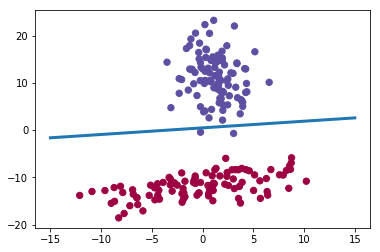

In [405]:
plt.scatter(data_work['x1'].values,data_work['x2'].values, s=40, c=data_work['clase'].values, cmap=plt.cm.Spectral)
t1 = np.arange(-15, 15, 0.02)
plt.plot(t1, frontera(t1), lw=3)
plt.show()

### Pt3

In [406]:
data_new = np.array([[0,0,1],[0,1,0], [1,0,0], [1,1,1]])
data_new

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 1]])

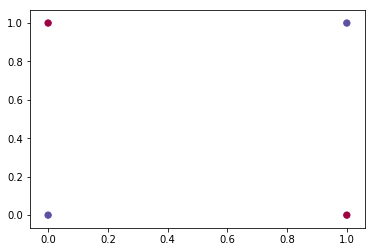

In [407]:
plt.scatter(data_new[:,0], data_new[:,1], s=40, c=data_new[:,2], cmap=plt.cm.Spectral)

Add x0=1, y multiplico por -1 para la clase w0

In [408]:
data_new_norm = np.array([[0,0,0,1],[0,0,-1,0], [0,-1,0,0], [0,1,1,1]])
data_new_norm

array([[ 0,  0,  0,  1],
       [ 0,  0, -1,  0],
       [ 0, -1,  0,  0],
       [ 0,  1,  1,  1]])

In [409]:
y_n = data_new_norm[:, [0,1,2]]
a = perceptron_train(y_n, nk=0.1, umbral=0.00001)
a

array([0., 0., 0.])

Estos datos representan la funcion XOR, la cual no es linealmente separable, por lo tanto la función de decisión no puede obtenerse utilizando un solo perceptron.

## Ejercicio 4: Criterio de Fisher

Dado un conjunto de n muestras d-dimensionales $x_1, ..., x_n$, $n_1$ en el subconjunto $D_1$ etiquetado $\omega_1$ y $n_2$ en el subconjunto $D_2$ etiquetado $\omega_2$. Si formamos una combinación lineal de los componentes de $x$, obtenemos el producto de punto escalar.

$$y=w^tx$$
y un conjunto correspondiente de $n$ muestras $y_1, ..., y_n$ dividido en los subconjuntos $\gamma_1$ y $\gamma_2$.

Una medida de la separación entre los puntos proyectados es la diferencia de las medias de las muestras.

$m_i$: media de d-dimensional $$m_i=\frac{1}{n_i} \sum_{x \in D_i } x$$

entonces, la media de la proyección está dada por:

$$\widetilde{m}_i=\frac{1}{n_i} \sum_{y \in \gamma_i } y$$
$$=\frac{1}{n_i} \sum_{y \in \gamma_i } w^tx=w^tm_i$$ y esto es la proyección de la media.

Se define la distancia entre las medias proyectadas:
$$|\widetilde{m}_1 - \widetilde{m}_2| = |w^t(m_1-m_2)|$$

Podemos hacer esta diferencia tan grande como deseamos simplemente al escalar $w$. Por supuesto, para obtener una buena separación de los datos proyectados, realmente queremos que la diferencia entre los medias sea grande en relación con alguna medida de las desviaciones estándar para cada clase.

Varianza: 
$$=\frac{1}{n} \sum_{x_i \in X }(x_i-\overline{X})^2$$ 

$x_{i}$: cada dato

$\overline{X}$:media de los datos

n: número de datos

Se define la dispersión(scatter) para muestras proyectadas etiquetadas $\omega_i$ como:
$$\widetilde{s}_i^2= \sum_{y \in \gamma_i } (y-\widetilde{m}_i)^2$$


Entonces $\frac{1}{n}(\widetilde{s}_1^2+\widetilde{s}_2^2)$ es una estimación de la varianza de los datos agrupados, y $\widetilde{s}_1^2+\widetilde{s}_2^2$ se denomina dispersión total dentro de la clase de las muestras proyectadas.

Finalmente, el discriminante lineal de Fisher emplea la función lineal $w^tx$ para la cual el criterio $J(w)$ es máximo.

$$J(w)=\frac{\mid \widetilde{m}_1 - \widetilde{m}_2 \mid^2}{\widetilde{s}_1^2+\widetilde{s}_2^2}$$

Para obtener $J(·)$ como una función explícita de $w$, se definen las matrices de dispersión $S_i$ y $S_W$:
$$S_i=\sum_{x \in D_i } (x-m_i)(x-m_i)^t$$
$$S_W=S_1+S_2$$
Se denomina $S_W$ la matriz de dispersión dentro de la clase.


Reescribiendo:
$$\widetilde{s}_i^2= w^tS_iw$$
$$\widetilde{s}_1^2+\widetilde{s}_2^2 = w^tS_Ww$$

$$(\widetilde{m}_1 - \widetilde{m}_2)^2 = (w^t{m}_1 - w^t{m}_2)^2 =w^t({m}_1-{m}_2)({m}_1-{m}_1)^tw = w^tS_Bw$$
siendo 
$$S_B=({m}_1-{m}_2)({m}_1-{m}_1)^t$$

Se denomina $S_B$ la matriz de dispersión entre clases.

En términos de $S_B$ y $S_W$, la función de criterio $J(·)$ se puede escribir como:
$$J(w)=\frac{w^tS_Bw}{w^tS_Ww}=\frac{(w^t{m}_1 - w^t{m}_2)^2}{w^tS_Ww}$$

In [410]:
data_original = pd.read_csv('dataset1Pr2.csv', names=["x1", "x2", "clase"])
data_work = data_original
data_work['clase'] = data_work['clase'].astype(int)
X = data_work[['x1', 'x2']].values
Y = data_work[['clase']].values
data_work.head()

,x1,x2,clase
0,1.00079,-14.96788,0
1,10.20447,-10.82023,0
2,-5.88639,-17.10331,0
3,-1.75679,-14.11208,0
4,1.05299,-11.21872,0


In [411]:
C1 = data_work[data_work['clase']==0][['x1', 'x2']]
C2 = data_work[data_work['clase']==1][['x1', 'x2']]

C1 = C1.values
C2 = C2.values

In [412]:
# medianas
means = [C1.mean(axis=0), C2.mean(axis=0)]
print(means)

[array([ -0.2861067, -11.7981939]), array([ 1.2259011, 11.1264771])]


In [413]:
# Sw = S1 + S2

S_W = np.zeros((2, 2))

# S1
for x_it in C1:
    S_W += np.outer(x_it - means[0], (x_it - means[0]))
        
# S2
for x_it in C2:
    S_W += np.outer(x_it - means[1], (x_it - means[1]))

w = np.linalg.inv(S_W).dot((means[1]-means[0]))
print("w: ", w)

w:  [-0.0010549   0.00781571]


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


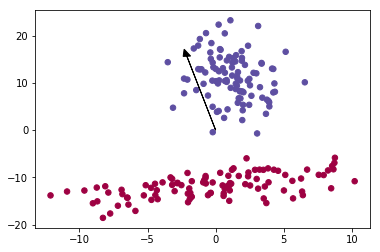

In [414]:
plt.scatter(X[:, [0]],X[:, [1]], s=30, c=Y[:, [0]], cmap=plt.cm.Spectral)
    
ax = plt.axes()        
ax.arrow(0, 0, w[0]*2000,w[1]*2000,head_width=0.55, head_length=1.5, fc='k', ec='k') 

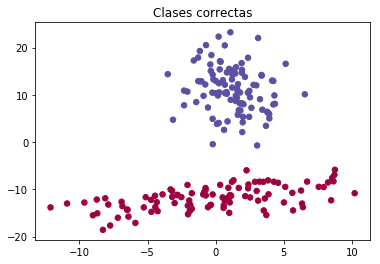

Precisión: 99.0%


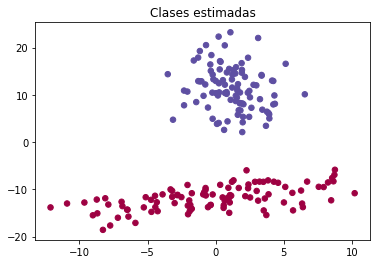

In [415]:
# 
y_correct = []
x_correct = []

for i in range(len(X)):
    if (X[i][0]*w[0]+X[i][1]*w[1] >= 0):
        clasif = 1
    else:
        clasif = 0
            
    if(clasif == Y[i]):
        x_correct.append(X[i])
        y_correct.append(clasif)
        
x_correct = np.array(x_correct)
y_correct = np.array(y_correct)

plt.title('Clases correctas')
plt.scatter(X[:, [0]],X[:, [1]], s=30, c=Y[:, [0]], cmap=plt.cm.Spectral)
plt.show() 


plt.title('Clases estimadas')
plt.scatter(x_correct[:, [0]],x_correct[:, [1]], s=30, c=y_correct.reshape(y_correct.shape[0],1), cmap=plt.cm.Spectral)

print ("Precisión: {0}%".format(x_correct.shape[0]*100/200))

## Ejercicio 5: Regresión logística

### Pt1

Regresión logística dos clases.
Sean $C_1, C_2$, las clases a la que pertenecen las muestras x.
se define las distribuciones a posteriori como:
$$p(C_1|x) = y(x) = \sigma(w^t x)$$
$$p(C_2|x) = 1 − p(C_1|x)$$
La función $\sigma(a) = \frac{1}{1+\exp(-a)}$ se conoce como sigmoide.


Verifica las siguientes propiedades:
        $\sigma(a)$ es creciente y su rango es $[0, 1)$. 
        Puede ser interpretada como una probabilidad $\sigma(a) = 1 − \sigma(a)$

Disponemos de N muestras independientes etiquetadas, ${x_n, y_n}$ $n = 1, 2, . . . , N$, con $y_n  \in \{0, 1\}$. Definimos $y = (y_1, y_2, . . . , y_N)^t$ .
Cada muestra $x_n$ sigue una distribución de Bernoulli de parámetro
$t_n = p(C_1\mid x_n)=  \sigma(w^t x)$, y debido a la independencia tenemos que la verosimilitud es 
$$p(y \mid w) = \prod_{n=1}^{N} t_n^{y_n}(1 − t_n)^{1-y_n}$$
Para obtener el w óptimo debemos maximizar esta expresión, o podemos minimizar el costo

$$E(w)= -\ln p(y \mid w) $$

Se define 
$$\sigma(x_i, w)=\frac{1}{1+\exp(-(w_0 + \sum_{j=1}^k w_{ij}x_{ij}))}$$

Entonces:

$$\ln(w \mid X,y) = -\ln p(y \mid w) $$ 
$$= -\ln (\prod_{n=1}^{N} t_n^{y_n}(1 − t_n)^{1-y_n}) $$
$$\ln(w \mid X,y) = -\ln (\prod_{n=1}^{N} \sigma(x_n,w)^{y_n}(1 − \sigma(x_n,w))^{1-y_n}) $$

### Pt2

Usando las propiedades del logaritmo
$$\ln(w \mid X,y)=-\sum_{n=1}^{N} \ln (\sigma(x_n,w)^{y_n}(1 − \sigma(x_n,w))^{1-y_n}) $$
$$=-\sum_{n=1}^{N} \ln (\sigma(x_n,w)^{y_n}) + \ln (1 − \sigma(x_n,w))^{1-y_n} $$
$$=-\sum_{n=1}^{N} {y_n}\ln (\sigma(x_n,w)) + ({1-y_n})\ln (1 − \sigma(x_n,w))$$

$$\frac{\partial}{ \partial w_j}\ln(w \mid X,y) = \frac{\partial}{ \partial w_j}-(\sum_{n=1}^{N} {y_n}\ln (\sigma(x_n,w)) + ({1-y_n})\ln (1 − \sigma(x_n,w)))$$ 

<hr>
Propiedades logaritmo
$$\ln(x y) = \ln(x) + \ln(y)$$
$$\ln(\frac{x}{y}) = \ln(x) - \ln(y)$$
$$\ln(x^y) = y\ln(x)$$

Propiedades derivadas
$$\ln'(u) = \frac{u'}{u}$$
$$(\frac{1}{u})' = -\frac{u'}{u^2}$$
$$(\exp(u))' = u'\exp(u)$$
<hr>
Derivando el primer factor
$$ln'(σ(xn,w))= \frac{σ'(xn,w)}{σ(xn,w)}$$
$$σ'(xn,w) = (1+\exp(-(w_0 + \sum_{j=1}^k w_{ij}x_{ij})))'* σ^2(xn,w)$$
$$ = (σ^{-1}(xn,w))' σ^2(xn,w)$$
$$ = x_{ij}(σ^{-1}(xn,w)-1)σ^2(xn,w)$$
$$ = x_{ij}(σ(xn,w) - σ^2(xn,w))$$

Entonces:
$$ln'(σ(xn,w))= \frac{x_{ij}(σ(xn,w) - σ^2(xn,w))}{σ(xn,w)}$$
$$ln'(σ(xn,w))= x_{ij}(1 - σ(xn,w))$$
<hr>
Derivando el segundo factor
$$ln'(1-σ(xn,w))= \frac{(1-σ(xn,w))'}{1-σ(xn,w)}$$
Derivando
$$(1-σ(xn,w))' = -σ'(xn,w)$$
$$ln'(1-σ(xn,w))= -\frac{σ'(xn,w)}{1-σ(xn,w)}$$
$$= -\frac{x_{ij}(σ(xn,w) - σ^2(xn,w))}{1-σ(xn,w)}$$
Factor común
$$= -\frac{x_{ij}(σ(xn,w)(1-σ(xn,w)))}{1-σ(xn,w)}$$
Cancelando
$$ln'(1-σ(xn,w))= -x_{ij} σ(xn,w)$$
<hr>

Uniendo todo:
$$= -(\sum_{n=1}^{N} {y_n}\ln (\sigma(x_n,w)) + ({1-y_n})\ln (1 − \sigma(x_n,w)))'$$ 
$$=-\sum_{n=1}^{N} {y_n}x_{ij}(1 - σ(xn,w))+ ({1-y_n})(-x_{ij} σ(xn,w))$$
$$=-\sum_{n=1}^{N} {y_n}x_{ij} - {y_n}x_{ij}σ(xn,w) -x_{ij} σ(xn,w) +y_n x_{ij} σ(xn,w)$$
$$=-\sum_{n=1}^{N} {y_n}x_{ij} -x_{ij} σ(xn,w)$$
$$\frac{\partial}{ \partial w_j}\ln(w \mid X,y)=-\sum_{n=1}^{N} x_{ij}({y_n} -σ(xn,w))$$

### Pt3

In [416]:
data_original = pd.read_csv('dataset2Pr2.csv', names=["x1", "x2", "clase"])
data_work = data_original
data_work['clase'] = data_work['clase'].astype(int)
data_work['x0'] = 1
data_work = data_work[['x0', 'x1', 'x2', 'clase']]
data_work.head()
X = data_work[['x0', 'x1', 'x2']].values
Y = data_work[['clase']].values

In [417]:
def fi(xi, w):
    prod = np.dot(w.T, xi)    
    ex = math.exp(-prod)    
    di = 1/(1+ex)
    return di

In [418]:
def log_ver_gradiente(xi,yi, w):
    return xi * (yi - fi(xi,w))

In [419]:
def regresion_train(x, y, nk=0.01, umbral=0.01):
    w = np.array([0,0,0])
    while True: 
        log_ver = np.array([0.0,0.0,0.0])
        for i in range(len(x)):
            log_ver+= log_ver_gradiente(x[i],y[i],w)

        #print("log_ver: ", log_ver)
        ajuste = nk * log_ver
        w = w + ajuste
        if abs(np.sum(ajuste)) < umbral:
            break

    return w

In [420]:
w_calc = regresion_train(X, Y, umbral=0.01)

In [421]:
for i in range(len(X)):
    clasification = fi(X[i], w_calc)
    if(clasification>=0.5 and Y[i]==1):
        continue
    elif (clasification<0.5 and Y[i]==0):
        continue
    else:
       print("incorrect=====================") 

incorrect=====================
incorrect=====================
incorrect=====================
incorrect=====================
incorrect=====================
incorrect=====================


In [422]:
def frontera2(x, w):
    return (-w[0]+w[1]*x)/w[2]

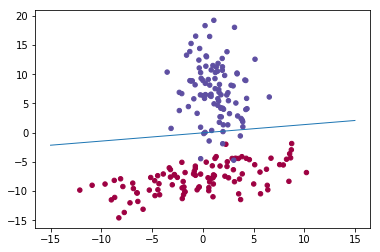

In [423]:
plt.scatter(X[:, [1]],X[:, [2]], s=20, c=Y[:, [0]], cmap=plt.cm.Spectral)
t1 = np.arange(-15, 15, 0.02)
plt.plot(t1, frontera2(t1, w_calc), lw=1)
plt.show()